# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split

# Importing the dataset

In [2]:
data=pd.read_csv('forestfires.csv')
data.head() #retrieving the first 5 records

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# EDA

In [3]:
data.shape  #no. of rows and columns.

(517, 31)

In [4]:
data.drop(['month','day'],axis=1,inplace=True) # Dropping the categorical feature month and day since its been already encoded.

In [5]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [32]:
data['size_category']=np.where(data['size_category']=='small',0,1)

In [33]:
data.size_category.unique() #checking the no. of unique categories in the dependent feature size.

array([0, 1])

### Since the output feature is categorical, converting them to numerical using np.where which searches in data['size_category'] is equal to small it is replaced with 0 else it is 1.

In [7]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [11]:
data_=data.drop('size_category',axis=1)

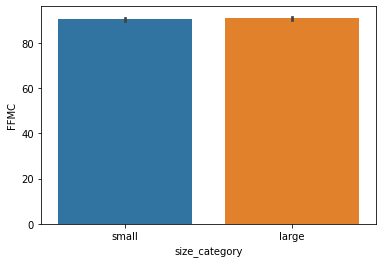

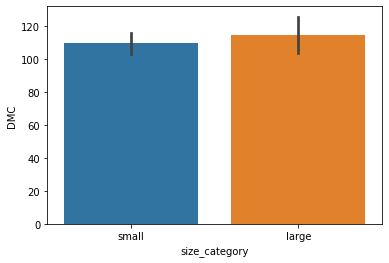

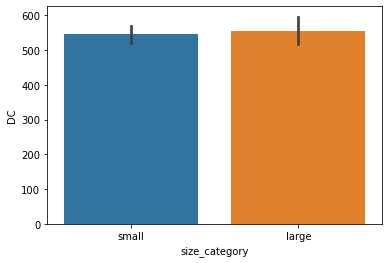

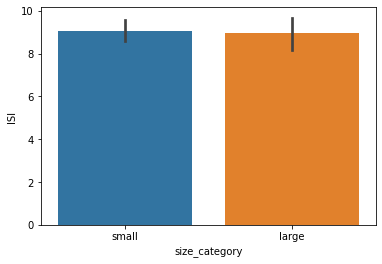

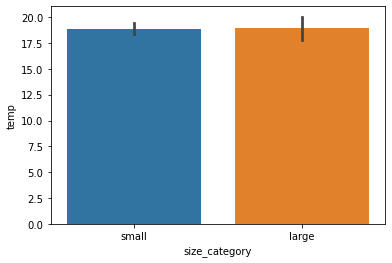

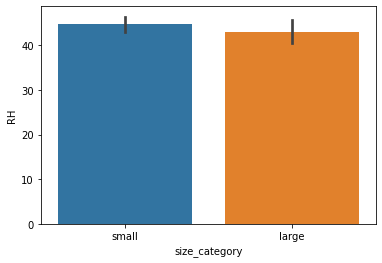

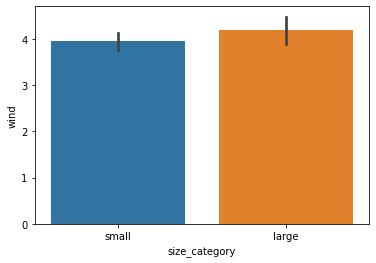

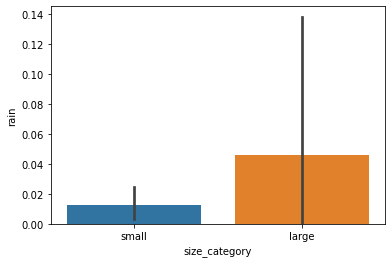

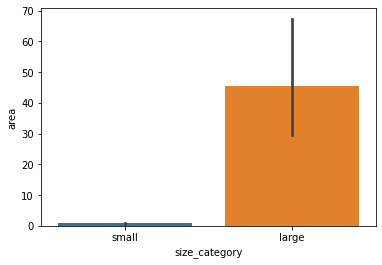

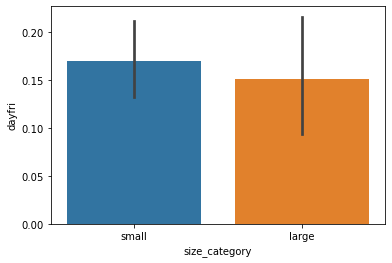

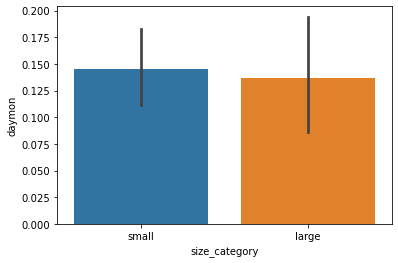

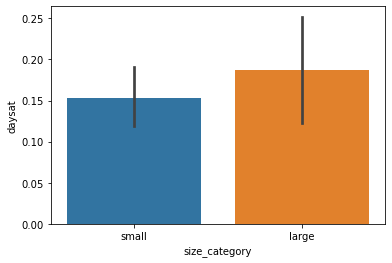

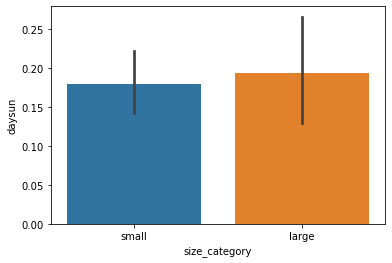

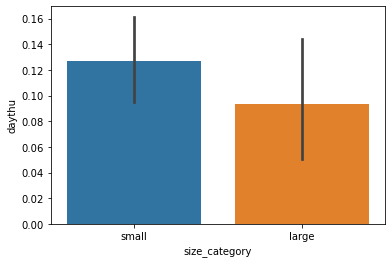

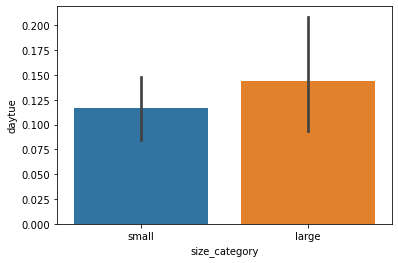

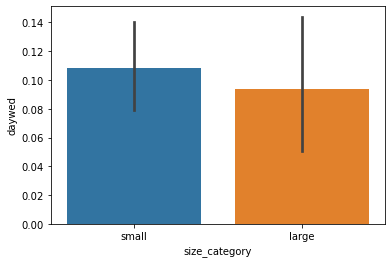

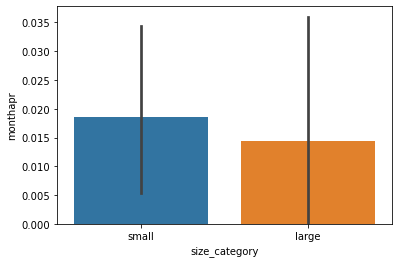

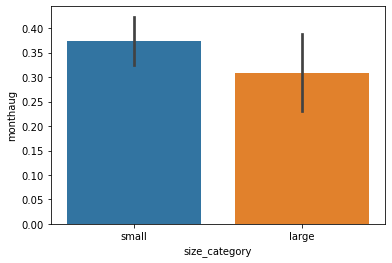

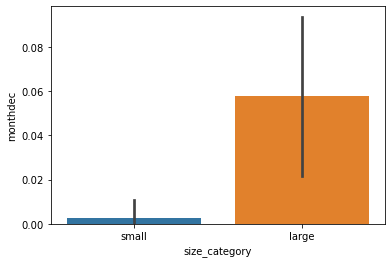

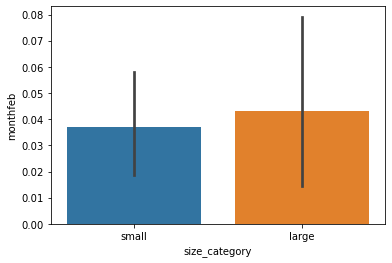

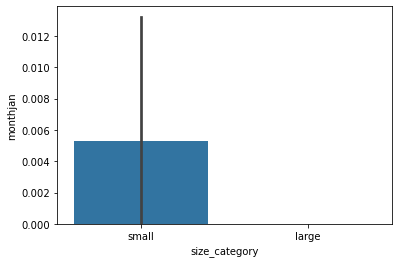

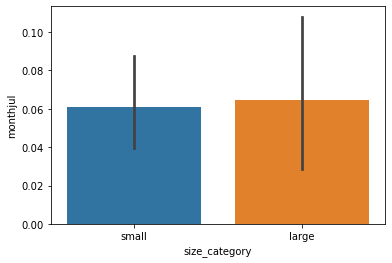

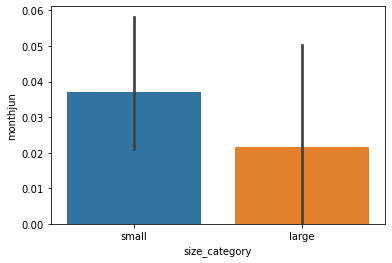

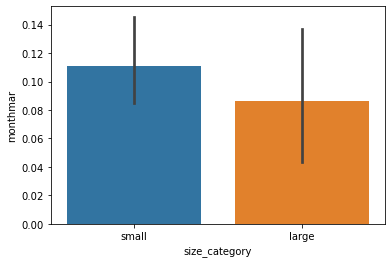

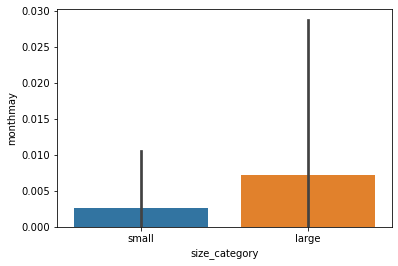

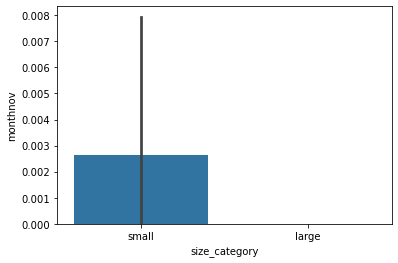

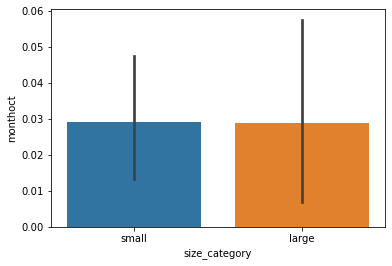

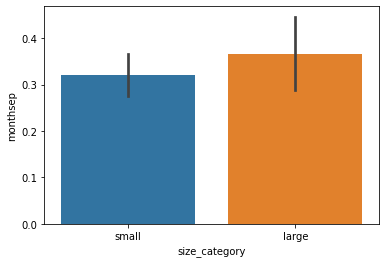

In [18]:
for i in data_.columns:
    sns.barplot(x=data['size_category'],y=data[i]) #plotting a boxplot for each input feature of 3 different class.
    plt.ylabel(i)
    plt.xlabel('size_category')
    plt.show()

### We can see that from the above figure the features are linearly seaparable and hence we can use SVM.

# Slicing the dataset to the dependent and independent features.

In [34]:
X=data.iloc[:,0:27] #independent feature
y=data.iloc[:,-1] #dependent feature

In [35]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)
y=y.to_numpy()
print(X)
print(y)

[[-8.05959472e-01 -1.32332557e+00 -1.83047676e+00 ... -6.23176953e-02
  -4.40225453e-02 -1.72859706e-01]
 [-8.10203395e-03 -1.17954077e+00  4.88890915e-01 ... -6.23176953e-02
  -4.40225453e-02  5.78503817e+00]
 [-8.10203395e-03 -1.04982188e+00  5.60715454e-01 ... -6.23176953e-02
  -4.40225453e-02  5.78503817e+00]
 ...
 [-1.64008316e+00 -8.46647711e-01  4.74768113e-01 ... -6.23176953e-02
  -4.40225453e-02 -1.72859706e-01]
 [ 6.80956663e-01  5.49002541e-01  2.69382214e-01 ... -6.23176953e-02
  -4.40225453e-02 -1.72859706e-01]
 [-2.02087875e+00 -1.68591332e+00 -1.78044169e+00 ... -6.23176953e-02
   2.27156334e+01 -1.72859706e-01]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

### Performing Standardisation using sklearn Standardscaler and fitting it to train and test dataset.Since the high magnitude features are dominant over the low magnitude ones, we perform standarisation of the features using the stanfdardscaler.

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=56) #splitting the train and test dataset with
#test size as 0.3 and random state as 56 for reproducibility.

In [37]:
kernel_=['rbf','poly','sigmoid','linear']
for i in kernel_:
    model=SVC(kernel=i,C=1)
    model.fit(x_train,y_train)
    print('Accuracy of model',i,':',model.score(x_test,y_test))

Accuracy of model rbf : 0.7948717948717948
Accuracy of model poly : 0.7435897435897436
Accuracy of model sigmoid : 0.8076923076923077
Accuracy of model linear : 0.9294871794871795


### Creating an instance of Support vector classifier with argument as kernel functions rbf,poly etc. I am passing different kernel function in for loop becuase some data has lot of overlapping which leads to misclassifications and cannot draw a margin to them but when we fit a threshold in higher dimension the data will be linearly separable. So through this I am fitting the model with appropriate kernel function with C(regularisation parameter) as 1 which adds penalty to the model for any misclassification. usually C value ranges between 0 to 100. A large value of C might overfit the model , so I have considered C value as 1. ranges between 0 to 100. A large value of C might overfit the model , so I have considered C value as 1. Accuracy of the linear is highest with 92.9%

In [38]:
param_grid={'C':[0.1,1,10,100,1000],'kernel':['linear'],'gamma': [1e-3, 1e-4]} 
grid=GridSearchCV(SVC(probability=True),param_grid,n_jobs=-1,verbose=5,cv=3)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    3.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.8s finished


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=5)

In [39]:
print(grid.best_params_)
y_pred=grid.predict_proba(x_test) #predicted probabilities of class 0 and class 1 for the test data.
print(grid.score(x_test,y_test))

{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.9615384615384616


### Instead of running multiple for loop we use GridSearch CV with C and gamma(another regularisation parameter) , cross validation(cv=3). Since we got the highest accuracy for linear, we choose linear as kernel function ,print the best parameter and score for the test data.

In [40]:
pd.DataFrame(y_pred) # predicted probabilities for the test data

,0,1
0,9.677921e-01,0.032208
1,9.181545e-01,0.081845
2,1.952095e-12,1.000000
3,1.002549e-01,0.899745
4,9.856105e-01,0.014389
...,...,...
151,9.119816e-01,0.088018
152,8.966359e-01,0.103364
153,9.736706e-01,0.026329
154,9.789884e-01,0.021012


In [41]:
from sklearn.metrics import accuracy_score
y_pred_value=np.where(y_pred[:,1]>0.5,1,0)

In [42]:
y_pred_value

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0])

In [43]:
y_test

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_value)

array([[118,   3],
       [  2,  33]], dtype=int64)

### As we can see that the accuracy is really good.